# SIMULACIÓN | PROYECTO UNIDAD 1




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: lunes 7 de noviembre 13 horas


- Este trabajo pondera un 25% del total del curso 

**Integrantes:** 
* Gastón Bustamante
* Sebastián Lara
* Felipe Vidal

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import statistics
import scipy.stats 
from IPython.display import Image
import math
from IPython.display import display, Math
import ipywidgets as widgets

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns
import random
from IPython.core.pylabtools import figsize

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

1. (1 punto) Analice la simulación, realice las siguientes modificaciones en el proceso e interprete sus resultados:

    (a) Modifique la distribución inicial de dinero. ¿Cómo se comporta el coeficiente de Gini y la distribución de la riqueza?
    
    (b) Modifique la función de transacción para aumentar o disminuir el índice de Gini. 
    
    (c) Comente la simulación propuesta ¿Qué otros factores inciden en los resultados de la simulación?
    
    
2. (1 punto) Defina eventos de interés $A$, $B$ y $C$ y calcule las siguientes probabilidades mediante la simulación propuesta:

    (a) $P(A), P(B) y P(C)$ 
    
    (b) $P(A \cup B) $ 

    (c) $P(A \mid C)$
    
Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$


#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [3]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0,pozo)
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [4]:

def simula(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion(dinerop[i], dinerop[j]) 
        yield dinerop

*** Ejemplo de la simulación con una poblacion, donde los cuatro actores inician con 100$ y 8 iteraciones ***

In [5]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
for pop in simula([100] * 4, 8):
    print(pop)

[100, 100, 100, 100]
[63.93210630381435, 136.06789369618565, 100, 100]
[63.93210630381435, 60.988877753013625, 100, 175.079015943172]
[63.93210630381435, 137.98498233171023, 23.003895421303405, 175.079015943172]
[63.93210630381435, 137.98498233171023, 167.69850947421654, 30.384401890258886]
[187.97210396216016, 137.98498233171023, 43.658511815870725, 30.384401890258886]
[22.353355251828077, 137.98498233171023, 209.2772605262028, 30.384401890258886]
[27.143417429973773, 137.98498233171023, 209.2772605262028, 25.59433971211319]
[149.08772332888947, 16.040676432794527, 209.2772605262028, 25.59433971211319]


*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [6]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()           


   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  20.0   55   74  100  125  147
 20,000 0.48  92.5    1   11   73  228  405
 40,000 0.50  99.3    1   10   71  230  455
 60,000 0.50  98.2    1   11   69  231  448
 80,000 0.50 100.4    1   11   69  230  458
100,000 0.50  98.4    1   11   69  231  455
120,000 0.50  99.3    1   10   69  227  456
140,000 0.50 100.3    1   10   70  232  464
160,000 0.50 100.3    1   10   69  227  468
180,000 0.50  97.5    1   11   70  230  449
200,000 0.51 101.7    1   10   67  228  476


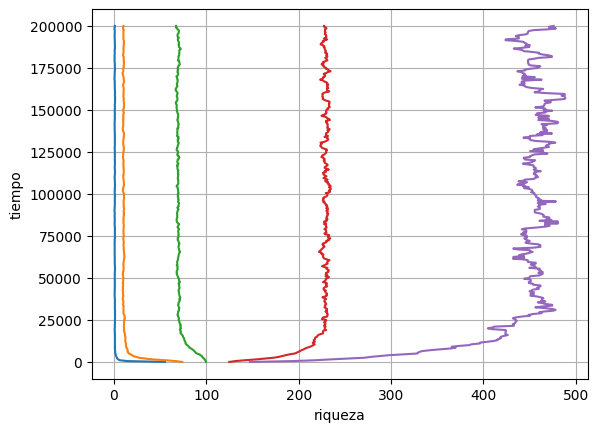

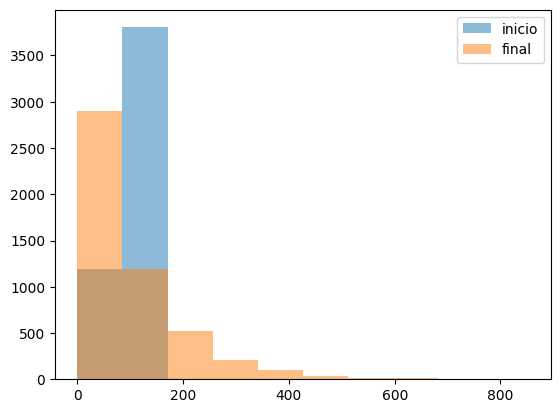

In [7]:
N  = 5000 # Tamaño de la población
MU = 100. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show(dinerop)

## 1.1

1. (1 punto) Analice la simulación, realice las siguientes modificaciones en el proceso e interprete sus resultados:

    (a) Modifique la distribución inicial de dinero. ¿Cómo se comporta el coeficiente de Gini y la distribución de la riqueza?
    
    R: Al modificar la cantidad inicial de dinero, el coeficiente de gini y la distribución de riqueza se mantienen similares a los valores previos. 
    

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11 203.7  526  744 1000 1267 1480
 20,000 0.49 973.5   11  107  720 2308 4517
 40,000 0.50 988.4   11  106  692 2311 4665
 60,000 0.49 971.7   12  110  718 2311 4478
 80,000 0.50 1003.9   10  107  697 2293 4465
100,000 0.50 1012.7    9  106  694 2312 4794
120,000 0.50 984.9   12  104  716 2304 4547
140,000 0.50 991.5   11  105  698 2337 4585
160,000 0.50 989.9   10   96  710 2247 4606
180,000 0.50 990.9    9   98  690 2333 4620
200,000 0.50 993.6   10  115  690 2337 4627


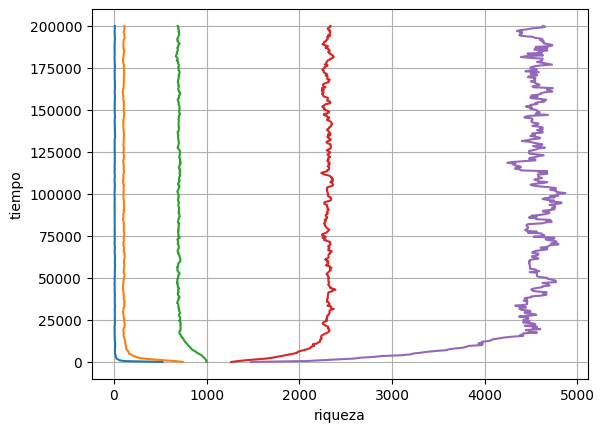

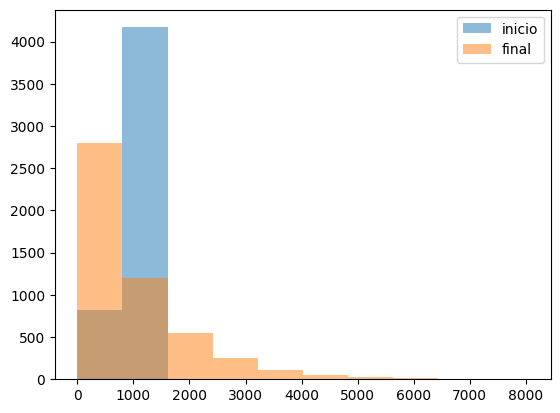

In [8]:
N  = 5000 # Tamaño de la población
MU = 1000. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show(dinerop)

(b) Modifique la función de transacción para aumentar o disminuir el índice de Gini. 
    
   

In [9]:
def transaccion2(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    aux = random.uniform(0,pozo/3)
    parte1 = pozo/3 + aux
    return parte1, pozo - parte1

In [10]:
def simula2(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion2(dinerop[i], dinerop[j]) 
        yield dinerop

In [11]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
for pop in simula2([100] * 4, 8):
    print(pop)

[100, 100, 100, 100]
[100, 125.40525236321405, 74.59474763678595, 100]
[69.89290614144801, 125.40525236321405, 74.59474763678595, 130.107093858552]
[69.89290614144801, 91.4490232879719, 108.5509767120281, 130.107093858552]
[107.53067232136975, 91.4490232879719, 70.91321053210636, 130.107093858552]
[107.53067232136975, 91.4490232879719, 106.01497918711974, 95.0053252035386]
[81.4360938782736, 91.4490232879719, 106.01497918711974, 121.09990364663474]
[111.34008997202795, 61.545027194217546, 106.01497918711974, 121.09990364663474]
[82.02217506929372, 61.545027194217546, 106.01497918711974, 150.41781854936897]


In [12]:
def show1(dinerop, k=80, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    sd = []
    p10 = []
    p90 = []
    g = []
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula2(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            p10.append(percent(10, pop))
            p90.append(percent(90, pop))
            g.append(gini(pop))
            sd.append(statistics.stdev(pop))#lista con la desviación estándar por iteración
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()           
    ##returns
    return g, sd, p10, p90

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11 198.6  533  743  998 1244 1456
 20,000 0.16 276.7  500  658  966 1365 1755
 40,000 0.16 275.9  507  665  966 1369 1737
 60,000 0.15 274.0  496  659  969 1367 1734
 80,000 0.16 277.9  492  662  961 1372 1746
100,000 0.15 273.1  506  664  963 1354 1742
120,000 0.16 279.7  496  658  960 1381 1746
140,000 0.15 273.5  502  661  969 1370 1713
160,000 0.16 276.0  491  661  968 1369 1740
180,000 0.16 275.0  503  656  969 1376 1706
200,000 0.16 275.2  503  661  966 1365 1716
220,000 0.15 273.6  500  668  969 1374 1715
240,000 0.16 277.5  497  660  964 1373 1732
260,000 0.16 277.2  499  660  966 1372 1756
280,000 0.16 277.2  507  662  962 1373 1771
300,000 0.15 274.0  506  667  968 1367 1720
320,000 0.16 278.5  495  656  965 1372 1764
340,000 0.16 276.0  501  665  968 1368 1751
360,000 0.16 274.9  498  662  965 1378 1704
380,000 0.16 274.8  493  664  962 1371 1724
400,000 0.16 275.8  494  659  96

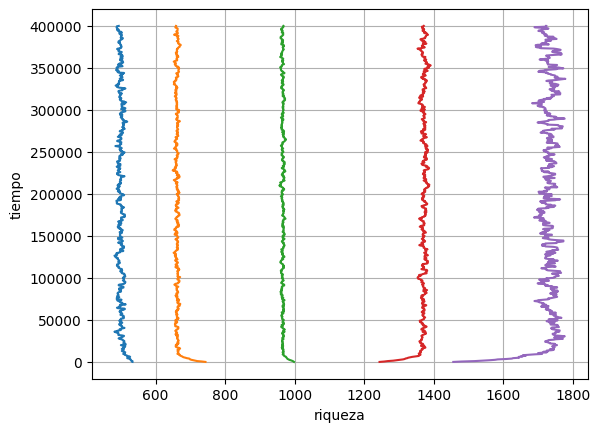

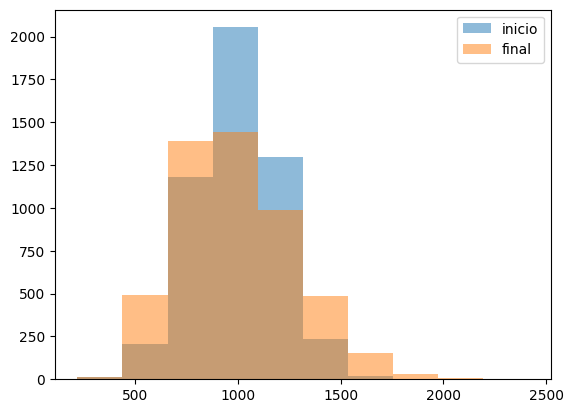

([0.11255919371210799,
  0.15584839590108457,
  0.15561324811424826,
  0.1545348856011417,
  0.15663244259722853,
  0.15360697369366028,
  0.1577489325042396,
  0.15452040971333103,
  0.1558326724434247,
  0.15573696530145442,
  0.1555218708892474,
  0.1545038601429276,
  0.1562621844817902,
  0.15597338657308013,
  0.15578182043432887,
  0.1549700353842678,
  0.15700442921487978,
  0.15540561385642215,
  0.1554650357056313,
  0.15510215744267453,
  0.15591613160465934],
 [198.56791536447713,
  276.67237433965823,
  275.9108483352543,
  274.0282577023909,
  277.93951439969356,
  273.10594351592385,
  279.7177612535091,
  273.48085011682934,
  275.9665942728993,
  275.00504678895766,
  275.1607296487756,
  273.6253339351691,
  277.45062288108636,
  277.21503213489893,
  277.2391811686707,
  273.9589556863749,
  278.4524051635626,
  276.0450584318406,
  274.9104538287811,
  274.8134857941562,
  275.7710441676063],
 [743.3639312333364,
  657.9087245675059,
  665.4086697606288,
  659.11581

In [13]:
N  = 5000 # Tamaño de la población
MU = 1000. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show1(dinerop)

(c) Comente la simulación propuesta ¿Qué otros factores inciden en los resultados de la simulación?

R: Principalmente incide la función de transacción, que es la que modifica las cantidades de dinero, los valores iniciales de dinero no afectan directamente a la distribución de riquezas. 

Decidimos utilizar estos parametros en la transacción, porque en la transacción original los usuarios podían perder gran parte de su dinero. En cambio con este nuevo sistema de transacción, tienen un tercio del dinero inicial como minimo en sus fondos.


## 1.2

In [14]:
def show2(dinerop, k=80, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    sd = []
    p10 = []
    p90 = []
    g = []
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            p10.append(percent(10, pop))
            p90.append(percent(90, pop))
            g.append(gini(pop))
            sd.append(statistics.stdev(pop))#lista con la desviación estándar por iteración
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()           
    ##returns
    return g, sd, p10, p90

Para la simulación usaremos una cantidad de dinero 800 y una población de tamaño 10000, con una transacción "justa"

Definicion de eventos

A: La desviación estándar de la población es mayor o igual que 800 pesos.

B: El percentil 10% es menor o igual que 83 pesos

C: El percentil 90% es mayor o igual que 1850 pesos

   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11 159.5  433  598  801 1007 1173
 80,000 0.49 767.8    9   91  576 1834 3549
160,000 0.50 793.6    8   84  556 1852 3591
240,000 0.50 805.4    7   83  554 1842 3672
320,000 0.50 808.1    8   83  558 1856 3744
400,000 0.50 818.1    8   85  551 1844 3831
480,000 0.50 796.2    8   88  550 1847 3666
560,000 0.50 801.3   10   83  555 1854 3765
640,000 0.50 800.7    9   87  556 1835 3743
720,000 0.50 809.3    8   85  555 1834 3711
800,000 0.50 804.9    8   84  551 1866 3627
880,000 0.50 801.4    8   83  558 1852 3686
960,000 0.50 802.3    7   85  552 1847 3644
1,040,000 0.50 797.6    9   84  559 1850 3684
1,120,000 0.50 799.1    7   85  553 1862 3653
1,200,000 0.50 791.6    9   89  558 1836 3624
1,280,000 0.50 799.1    9   83  555 1836 3698
1,360,000 0.50 809.9    8   83  546 1864 3760
1,440,000 0.50 797.1    9   86  555 1860 3614
1,520,000 0.50 807.9    7   80  552 1860 3713
1,600,000 0.50 803

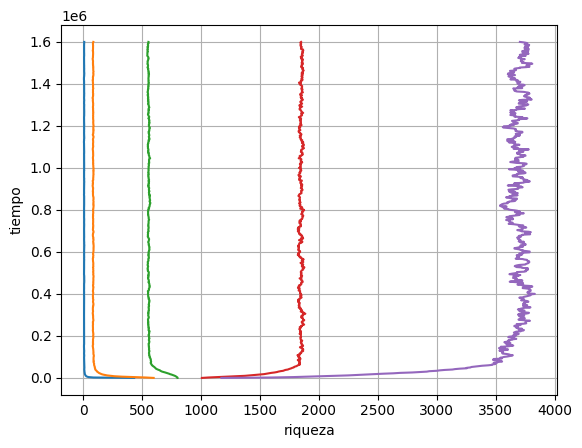

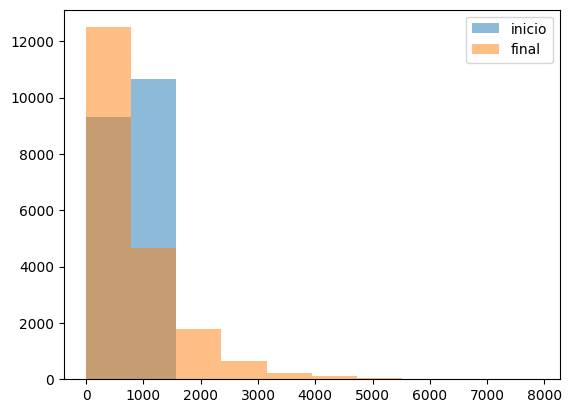

In [15]:
N  = 20000 # Tamaño de la población
MU = 800 # Dinero medio en la población

random.seed(14)
dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

g, sd, p10, p90 = show2(dinerop)

##### 2.a) P(A) , P(B) , P(C)

In [16]:
print('sd: ', sd)
print('p10: ', p10)
print('p90: ', p90)

sd:  [159.4640070273216, 767.7525349424243, 793.6307722551397, 805.399875284913, 808.0945797754052, 818.1402420722088, 796.1904084936699, 801.3031240883321, 800.7388311160626, 809.2990695369274, 804.9248548305817, 801.3516668004029, 802.3257102750915, 797.6462891004173, 799.1246015849995, 791.6129590319399, 799.0589335990207, 809.8846652411369, 797.1038172874656, 807.8859798963465, 803.1484551739001]
p10:  [597.8150235691487, 90.95192121829191, 84.19360711563195, 82.78469859818318, 82.96370808105253, 84.5758978062496, 87.65180485070549, 83.05793483800468, 86.77727762737686, 84.91296571913142, 83.66290178512554, 83.4583602640989, 85.43243865290515, 83.80204291805923, 84.7393472798399, 88.64550915705169, 83.17698373755212, 82.79957513663493, 86.31216339347827, 80.31660005668728, 86.0471661951823]
p90:  [1006.9230966238529, 1833.8437386418536, 1852.426821402616, 1842.1241911630702, 1855.6225743784394, 1843.934467771169, 1847.4400506677753, 1853.5429242602859, 1835.3735633238978, 1833.8752

In [17]:
a = b = c = 0

for i in range(len(sd)):
    if (sd[i] >= 800): a+=1
    if (p10[i] <= 83): b+=1
    if (p90[i] >= 1850): c+=1
        


pA = a/len(sd)
pB = b/len(p10)
pC = c/len(p90)

print('La probabilidad de que la desviación estándar sea mayor o igual a 800 pesos es: {}'.format(pA))
print('La probabilidad de que el percentil 10% sea menor o igual a 83 pesos es: {}'.format(pB))
print('La probabilidad de que el percentil 90% sea mayor o igual a 1850 pesos es: {}'.format(pC))

La probabilidad de que la desviación estándar sea mayor o igual a 800 pesos es: 0.5714285714285714
La probabilidad de que el percentil 10% sea menor o igual a 83 pesos es: 0.19047619047619047
La probabilidad de que el percentil 90% sea mayor o igual a 1850 pesos es: 0.47619047619047616


Por medio de esta simulación tenemos que: 

$$ P(A) \approx 0.57 $$

$$P(B) \approx 0.19$$

$$P(C) \approx 0.47$$

##### 2.b) $$ P(A \cup B)$$

Sabemos que: 

$$ P(A \cup B) = P(A) + P(B) - (P(A) * P(B))$$

In [18]:
AuB = pA + pB - (pA * pB)
print('La probabilidad de que la desviación estándar sea mayor o igual a 800 pesos \n o el percentil 10% sea menor o igual a 83 es: {}'.format(AuB))

La probabilidad de que la desviación estándar sea mayor o igual a 800 pesos 
 o el percentil 10% sea menor o igual a 83 es: 0.6530612244897959


##### 2.c) $$P(A \cap B) $$

Sabemos que:

$$ P(A \mid C) = \frac{P(A \cap C)}{P(C)} $$

$$ P(A \cap C) = P(A) + P(C) - P(A \cup C)$$

$$ P(A \cup C) = P(A) + P(C) - (P(A) * P(C))$$

$$P(A \cap B) \approx 0.65 $$


In [19]:
AuC = pA + pC - (pA*pC)
AnC = pA + pC - AuC
print("A unión C: " , AuC)
print("A intersectado con C: " , AnC)

A unión C:  0.7755102040816325
A intersectado con C:  0.27210884353741494


In [20]:
AdadoC = AnC / pC
print('La probabilidad de que la desviación estándar sea mayor o igual a 800 pesos \n dado que el percentil 90% sea mayor o igual a 1850 es: {}'.format(AdadoC))

La probabilidad de que la desviación estándar sea mayor o igual a 800 pesos 
 dado que el percentil 90% sea mayor o igual a 1850 es: 0.5714285714285714


Por medio de la simulación, obtenemos que:
    
$$ P(A \cap C) \approx 0.57 $$ 

# 2

## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos (al menos 1000 datos) de una variable aleatoria a valores reales. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio de datos climáticos: www.cr2.cl

0. Indique la fuente de sus datos. 


1. (0,5 pts) Descripcion de datos:  describa sus datos estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 

2. (1 punto) Seleccione aleatoriamente una cantidad N de sus datos y calcule 3 estadísticos muestrales, luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

3. (1 punto) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

4. (0,5 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.

5. (1 punto) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 


## 2.0

Los datos fueron obtenidos del UCI Machine Learning Repository <link>https://archive.ics.uci.edu/ml/datasets.php</link><br>
El dataset que utilizaremos es el de Wine Quality <link>https://archive.ics.uci.edu/ml/datasets/Wine+Quality</link> específicamente winequality-red.csv

## 2.1

In [21]:
vino = pd.read_csv('winequality-red.csv',delimiter=";")

In [22]:
vino

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
datos = vino['alcohol']
datos.describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

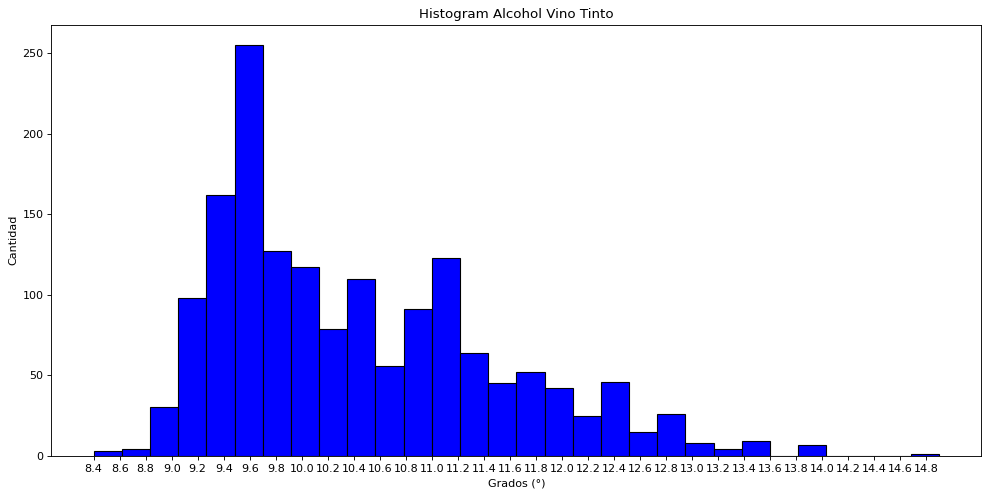

In [24]:

fig, ax = plt.subplots(1, 1,figsize=(15, 7), dpi=80)

ax.hist(datos, color = 'blue',edgecolor='black', bins=(int(15/0.5)))

plt.title('Histogram Alcohol Vino Tinto')
plt.xlabel('Grados (°)'); plt.ylabel('Cantidad');
plt.xticks(np.arange(8.4, 15, 0.2))

plt.show()

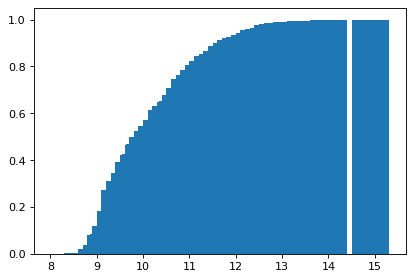

In [25]:
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,y = ecdf(datos)
ax.bar(x,y)

plt.draw()

Vamos a analizar un dataset de vinos tintos en el cual posee 12 columnas entre la que encontramos mas interesante para analizar la cantidad de alcohol presente en estos para obtener sus estadisticas asociadas.
Como vimos anteriormente en el histograma y ahora en la distribucion acumulada tenemos un dato extremo que nos empeora la grafica el cual se aleja por casi un grado del maximo anterior, por lo cual en el grafico acumulado posee una caida en el final.

## 2.2

In [26]:
N=np.random.randint(100,1599)

aleatoria = np.random.choice(list(datos),N,replace= False)
aleatoria

array([ 9.8       , 10.5       , 10.4       , 10.4       , 10.9       ,
       10.4       ,  9.9       , 11.9       , 10.8       ,  9.8       ,
        9.5       ,  9.5       , 10.8       ,  9.4       , 12.2       ,
       10.        , 10.5       , 14.        ,  9.1       , 12.6       ,
       11.4       ,  9.8       , 12.8       ,  9.4       , 14.        ,
        9.8       , 11.4       ,  9.8       ,  9.2       , 10.8       ,
        9.5       ,  9.5       , 11.1       , 11.6       , 10.5       ,
       11.9       , 10.5       , 10.1       , 12.6       , 10.9       ,
       10.5       ,  9.4       ,  9.5       ,  9.5       , 10.6       ,
       11.5       , 11.3       , 10.        , 10.5       ,  9.5       ,
       11.8       , 10.5       ,  9.2       , 10.2       ,  9.7       ,
        9.        , 10.2       ,  9.25      , 10.3       , 12.6       ,
        9.4       ,  9.4       , 11.1       , 11.        , 10.8       ,
        9.2       , 10.9       ,  9.6       ,  9.2       , 11.2 

In [27]:
promedio = sum(aleatoria)/len(aleatoria)
varianza = statistics.variance(aleatoria)
mediana = statistics.median(aleatoria)
print('Promedio:',promedio)
print('Varianza:',varianza)
print('Mediana:',mediana)

Promedio: 10.431902035623407
Varianza: 1.1513783383769833
Mediana: 10.149999999999999


In [28]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, HBox
import ipywidgets as widgets

Nn = IntSlider(min=49, max=1599, step=50, value= 100) #Valor de n variable

def slider(N_n):
    
    n = N_n # valor original 150
    aleatoria = np.random.choice(list(datos),N_n,replace= False)
    promedio = sum(aleatoria)/len(aleatoria)
    varianza = statistics.variance(aleatoria)
    mediana = statistics.median(aleatoria)

    print('Promedio:',promedio)
    print('Varianza:',varianza)
    print('Mediana empírica:', mediana)
    
ip = interactive(slider,N_n=Nn)
display(HBox(ip.children[:-1]))#Show all controls
display(ip.children[-1])#Show the output

Output()

In [29]:
N = np.arange(99,1599,50)
mean = [promedio]
var = [varianza]
med = [mediana]
for i in range(len(N)-1):
    aleat = np.random.choice(datos,N[i+1],replace = False)
    mean += [sum(aleat)/len(aleat)]    
    var += [statistics.variance(aleat)]
    med += [statistics.median(aleat)]

Text(0, 0.5, 'Mediana')

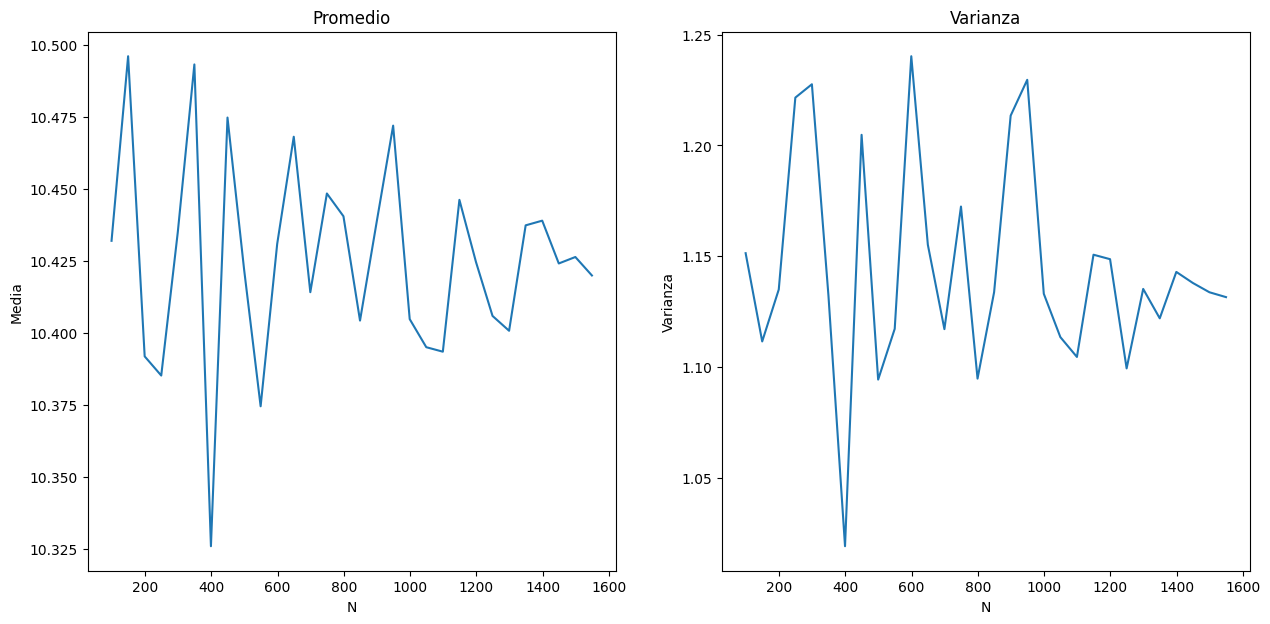

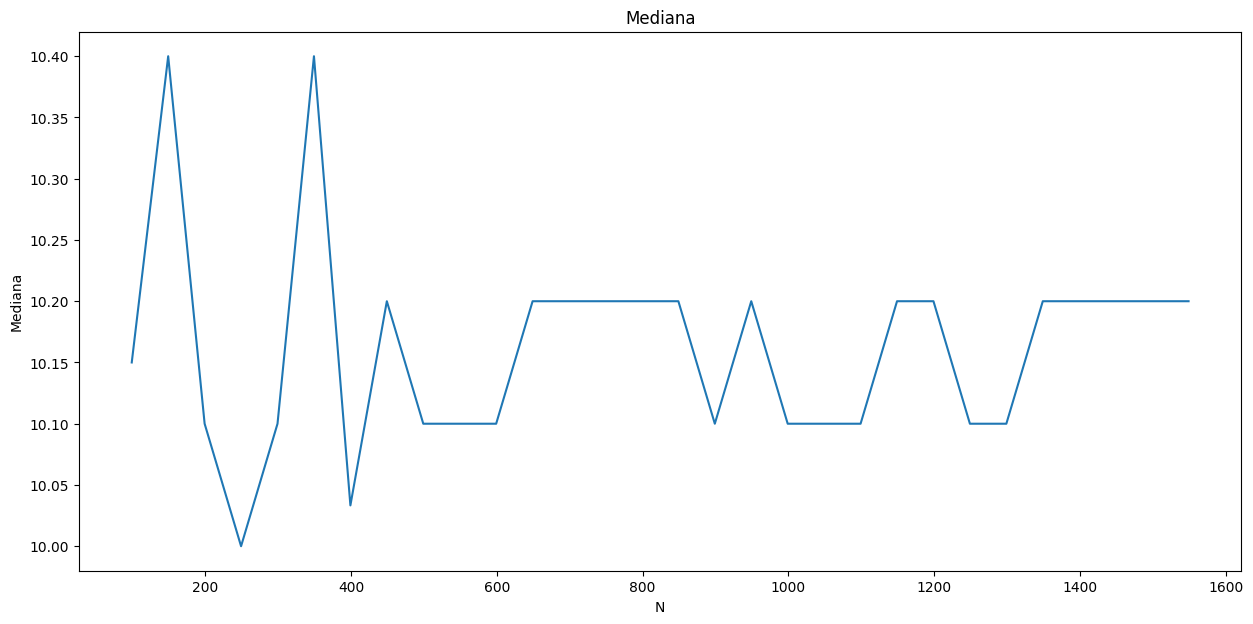

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
fig, ax1 = plt.subplots(1, figsize=(15, 7))
ax[0].plot(N,mean)
ax[0].set_title('Promedio')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Media')
ax[1].plot(N,var)
ax[1].set_title('Varianza')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Varianza')
ax1.plot(N,med)
ax1.set_title('Mediana')
ax1.set_xlabel('N')
ax1.set_ylabel('Mediana')

Segun la ley de los grandes numeros podemos ver que a medida que aumenta nuestra muestra los 3 estadisticos comienzan a converger en los valores de la muestra original. En este caso partir de las 1000 muestras vemos que los valores rondan la media y varianza de nuestra muestra original. En el caso de la mediana es mas complicado de analizar pues esta es muy sensible a los valores extremos.

## 2.3

In [31]:
n = 1000 # numero de muestras
promedio = []
var = []
med = []
for i in range(n):
    random = np.random.choice(datos,size = 50,replace = True) # size = elementos de la muestra
    promedio += [sum(random)/len(random)]
    var += [statistics.variance(random)]
    med += [statistics.median(random)]

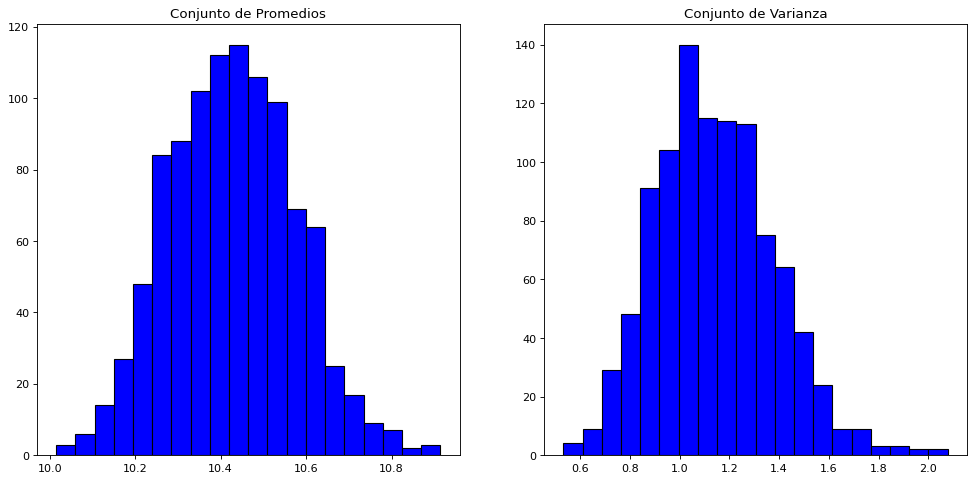

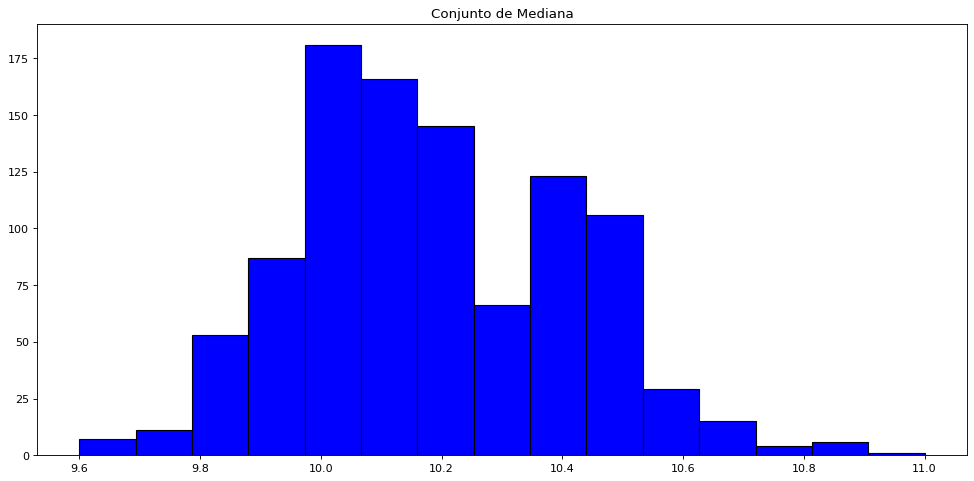

In [32]:
fig, ax = plt.subplots(1, 2,figsize=(15, 7), dpi=80)
fig, ax1 = plt.subplots(1,figsize=(15, 7), dpi=80)
ax[0].hist(promedio, color = 'blue',edgecolor='black', bins=(20))
ax[1].hist(var, color = 'blue',edgecolor='black', bins=(20))
ax1.hist(med, color = 'blue',edgecolor='black', bins=(15))
ax[0].set_title('Conjunto de Promedios');
ax[1].set_title('Conjunto de Varianza');
ax1.set_title('Conjunto de Mediana');

Podemos ver que los estadisticos escogidos cumplen con el teorema central del limite, ya que al dividir nuestro conjunto en varios subconjuntos calculando sus estadisticos y graficándolo obtenemos que se aproximan a una distribucion normal. Mientras mayor sea la cantidad de muestras mejor tiende a ser esta aproximación.


## 2.4

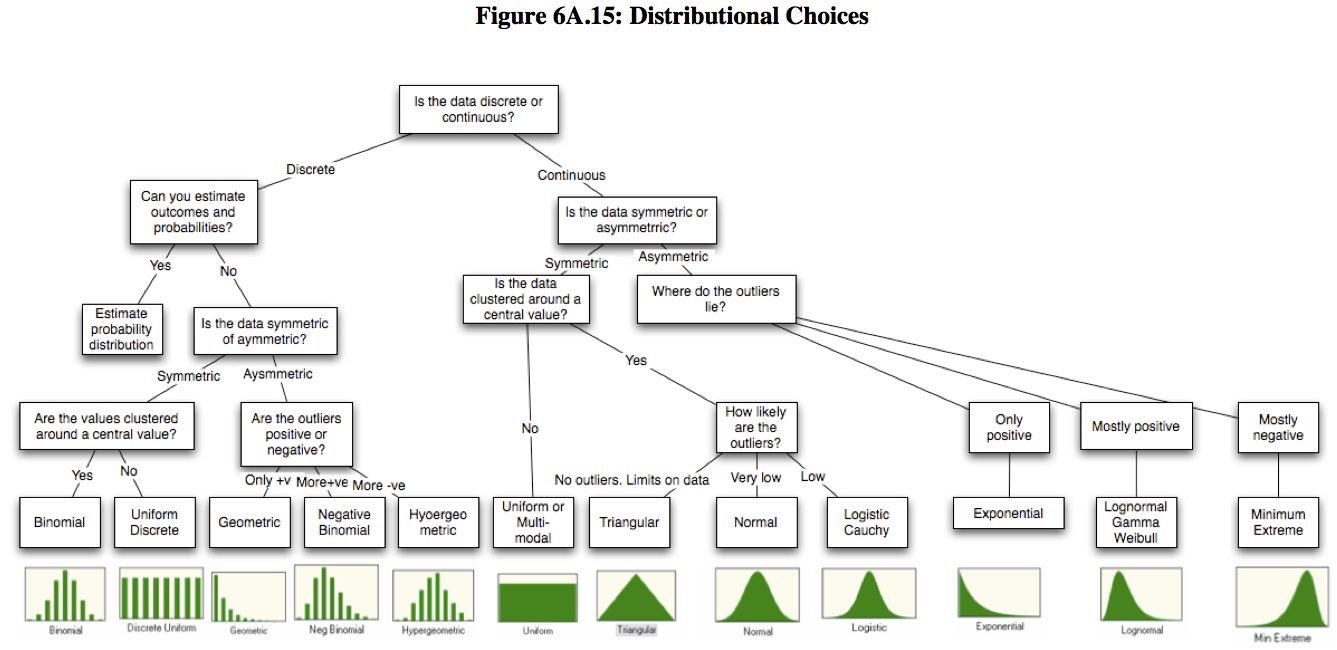

In [33]:
Image("distributions_choice.png")

Segun la imagen de las distribuciones vemos que nuestro histograma se acerca mas a una Lognormal, ademas de cumplir las caracteristicas de esta distribucion como ser asimetrica.

(0.4596551807488058, 8.121579871759721, 2.0735496300243694)


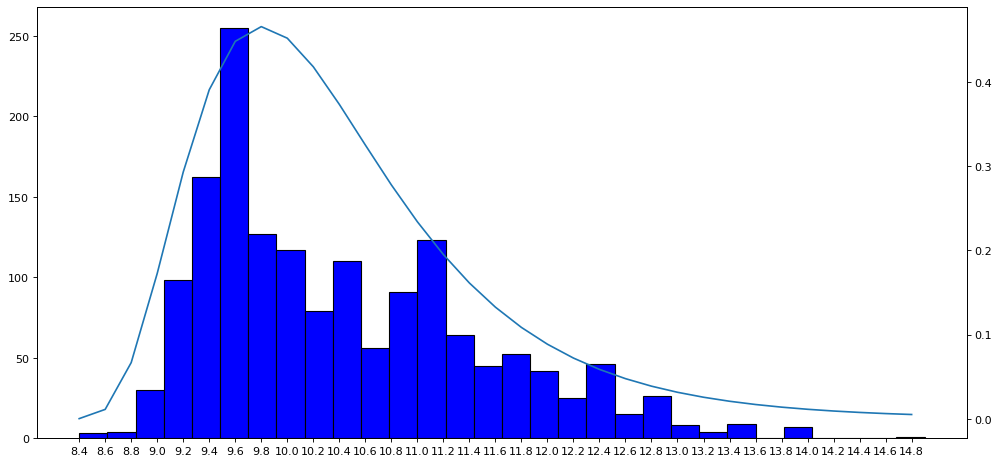

In [34]:
fig, ax = plt.subplots(1, 1,figsize=(15, 7), dpi=80)

ax.hist(datos, color = 'blue',edgecolor='black', bins=(int(15/0.5)))
ax2 = ax.twinx()
args = scipy.stats.lognorm.fit(datos)
print(args)
vec = np.arange(8.4, 15, 0.2)

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args[0],scale=args[2],loc=args[1]))
ax2.plot(vec,pvec)
plt.xticks(np.arange(8.4, 15, 0.2))
plt.draw()

In [43]:
datos2 = scipy.stats.lognorm.rvs(*args,size=100)
scipy.stats.kstest(datos, datos2)

KstestResult(statistic=0.13464040025015636, pvalue=0.05989817442430312)

Al comprar la distribución de los datos a una distribución Lognormal con el test Kolmogorov-Smirnov, el test nos retorna un valor p=0.059891744230312, si lo analizamos con un 95% de confianza NO podemos rechazar la hipótesis ya que p>0.05.

## 2.5

In [36]:

def mse(est, listest): #mean square error
    sum = 0
    a = 0
    for i in listest:
        sum += (est-i)**2
        a +=1
    mse_val = sum/a
    return mse_val    

b = 100
datos = vino["alcohol"]
n = len(datos)

m = statistics.mean(datos)
md = statistics.median(datos)
sd = statistics.stdev(datos)

means = []
medians = []
sds = []

for i in range (b):
    bdata = np.random.choice(list(datos),size=n,replace=True)
    means.append(bdata.mean())
    medians.append(statistics.median(bdata))
    sds.append(statistics.stdev(bdata))

print("\nValor de b: " + str(b))
varMA = statistics.variance(means)
range = 1.96*math.sqrt(varMA)
print("\nVarianza medias: " + str(varMA))
display(Math('%0.2f \pm %0.2f' % (m, range )))
print("Error medio cuadratico de la media aritmetica : " + str(mse(m, means)))
    
varMED = statistics.variance(medians)
range = 1.96*math.sqrt(varMED)
print("\nVarianza medianas: " + str(varMED))
display(Math('%0.2f \pm %0.2f' % (md, range )))
print("Error medio cuadratico de las medianas : " + str(mse(md, medians)))

varSD = statistics.variance(sds)
range = 1.96*math.sqrt(varSD)
print("\nVarianza desviaciones estandar: " + str(varSD))
display(Math('%0.2f \pm %0.2f' % (sd, range )))
print("Error medio cuadratico de las desviaciones estándar : " + str(mse(sd, sds)))


Valor de b: 100

Varianza medias: 0.0006594266772292984


<IPython.core.display.Math object>

Error medio cuadratico de la media aritmetica : 0.0006573705449374667

Varianza medianas: 0.0025212121212121034


<IPython.core.display.Math object>

Error medio cuadratico de las medianas : 0.004799999999999971

Varianza desviaciones estandar: 0.0003533892128096873


<IPython.core.display.Math object>

Error medio cuadratico de las desviaciones estándar : 0.00037746542537143155


Recordando los estadísticos de nuestra muestra original:

In [38]:
datos.describe()


count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [39]:
mediana = ( 8.4 + 14.9 ) /2
print (mediana)

11.65



Vemos que en los estadísticos de los valores obtenidos con bootstrapping tienen una diferencia muy baja a los valores de la muestra original, incluso algunos caen dentro de las cotas de variancia de los estadísticos obtenidos por bootstraping. La excepción a esto es la mediana que como ya se había nombrado anteriormente es muy afectada por los valores extremos dentro de la muestra.

### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 


## 3.1

Para el caso de el ejercicio 1 podemos ver que a medida que teniendo nuestra transaccion "justa" no lo es, pues a medida que las transacciones se van realizando comienza a aumentar la desigualdad entre la poblacion. Esto lo podemos ver con el indice de gini que a medida que se van realizando transacciones va en aumento hasta llegar al valor de 0.5. Esto se puede ver reflejado en los percentiles mas altos y mas bajos teniendo en el percentil 10 valores cercanos al 10% de la cantidad inicial y en los percentiles mas altos como el 90 mas del doble de la cantidad inicial. Entonces nuestra transaccion hace que varie mucho el dinero entre la poblacion causando un alto indice de desigualdad.


En el caso del ejercicio 2 podemos comprobar como con una parte representativa de la poblacion se pueden obtener valores bastante cercanos de los estadisticos de la muestra original, en nuestro caso analizamos el grado alcoholico de los vinos y con grupos de 159 vinos elegidos aleatoriamente llegamos a valores muy cercanos a los del conjunto completo. Esto tambien se refleja con los conjuntos acumulados de la actividad 2.3. Con respecto a las conclusiones globales del estudio podemos ver que las gradualidades alcoholicas de los vinos estan mas concentradas en valores cercanos a los 9.3° aunque nuestra media de datos tiende a estar en los 10.4°, esto se puede deber a los valores extremos en los cuales en los cuales se encuentran algunos valores mayores a los 12°. Por otro lado vemos que las diferencias de gradualidad media tiende a estar entre los 0.5 y 1°.

## 3.2

Que los datos sean independientes significa que los atributos de una variable no se ven afectados por los demás datos de otras variables y sus atributos, de la mano a aquello se consideran idénticamente distribuidas si cada una de las variables tiene la misma distribución de probabilidad.

La condición de variables independientes e idénticamente distribuidas se debe cumplir para grupos seleccionados aleatoriamente ya que si existiera una correlación previa entre los datos, al elegir una muestra datos aleatorios dentro de la muestra original estos perderían su correlación y obtendríamos resultados completamente distintos que no representarían a la muestra original, aún menos tener proyecciones utliziando estos en técnicas de remuestreo como lo es bootstraping.